<a href="https://colab.research.google.com/github/kmkarakaya/Deep-Learning-Tutorials/blob/master/Training_a_Hugging_Face_causal_language_model_from_scratch_(TensorFlow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Train a Hugging Face Causal Language Model from Scratch with a Custom Dataset and a Custom Tokenizer?

**Author:** [Murat Karakaya](https://www.linkedin.com/in/muratkarakaya/)<br>

**Date created.....** 30 06 2022<br>
**Date published...** 05 07 2022<br>
**Last modified....** 05 07 2022<br>


**Description:** In this tutorial series, we will learn and use the 🤗 Hugging Face Transformer API  

* how to build and preprocess a Custom Dataset from a CSV file with the 🤗 Hugging Face Datasets API
* how to train a 🤗 Hugging Face Tokenizer from scratch with the 🤗 Hugging Face Tokenizer API
* how to train a Causal Language Transformer Model from scratch 
* how to push (upload) a Model, Dataset, and Tokenizer to the 🤗 Hugging Face Hub
* how to download and use a Model, Dataset, and Tokenizer from the 🤗 Hugging Face Hub
* how to generate text using the 🤗 Hugging Face Text Generation Pipeline

We will cover all these topics with sample implementations in **Python / TensorFlow / Keras** environment.

We will use a [Kaggle Dataset](https://www.kaggle.com/savasy/multiclass-classification-data-for-turkish-tc32?select=ticaret-yorum.csv) in which there are 32 topics and more than 400K total reviews.

At the end of this tutorial, we will be able to generate text using a GPT2 transformer model trained on a Turkish review dataset as below: 

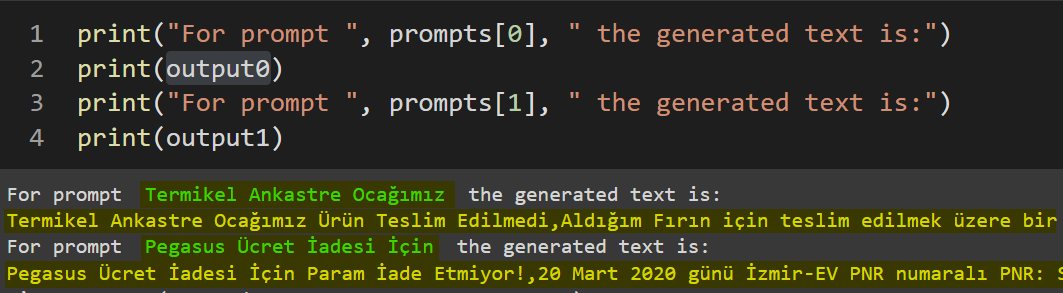

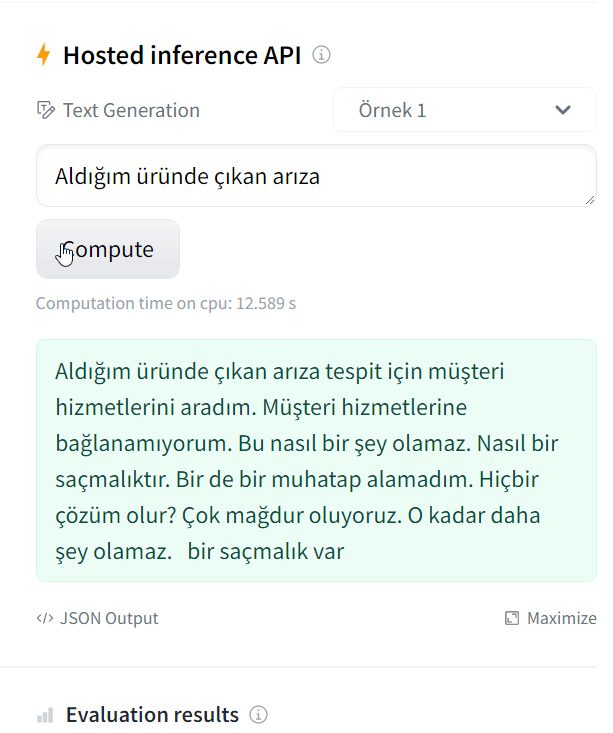


If you would like to learn more about **Deep Learning** with practical coding examples, 
* Please subscribe to the **[Murat Karakaya Akademi YouTube Channel](https://www.youtube.com/channel/UCrCxCxTFL2ytaDrDYrN4_eA?sub_confirmation=1)** or 
* Follow my blog on **[Medium]()**
* Do not forget to turn on **notifications** so that you will be notified when new parts are uploaded.

You can access all the **codes, videos, and posts** of this tutorial series from the **links below**.

**Accessible on:**
* [YouTube in English](https://youtube.com/playlist?list=PLQflnv_s49v9d9w-L0S8XUXXdNks7vPBL)
* [YouTube in Turkish](https://youtube.com/playlist?list=PLQflnv_s49v8aajw6m9MRNbAAbL63flKD)
* [Medium](https://medium.com/deep-learning-with-keras/how-to-train-a-hugging-face-causal-language-model-from-scratch-8d08d038168f)
* [Github pages](https://kmkarakaya.github.io/Deep-Learning-Tutorials/)
* [Github Repo](https://github.com/kmkarakaya/Deep-Learning-Tutorials/blob/master/Multi_Topic_Text_Classification_With_Deep_Learning_Models.ipynb)
* [Google Colab](https://colab.research.google.com/drive/1pkrFeHJPIbQO1ws4mKvKHiGnBiM_qGc5?usp=sharing)



# PARTS

In this tutorial series, there will be several parts to cover the **Training a Hugging Face Causal Language Model (Transformer) from Scratch with a Custom Dataset** topic in detail as follows:

* **PART A:** Prepare a 🤗 Hugging Face Dataset from Data in CSV Format
* **PART B:** 🤗 Hugging Face Tokenization: Use a Pre-trained Tokenizer or Train a New Tokenizer from scratch?
* **PART C:** Build a 🤗 Hugging Face Data Pipeline
* **PART D:** Train a 🤗 Hugging Face Causal Language Model (Transformer) from scratch
* **PART E:** Generate Reviews with a 🤗 Hugging Face Text Generation Pipeline

# References:
 * [Training a causal language model from scratch using  🤗 Hugging Face Transformers](https://huggingface.co/course/chapter7/6?fw=tf)
 
 * [Share a model to the 🤗 Hugging Face Hub](https://huggingface.co/docs/transformers/model_sharing)
 
 * [Share a dataset to the 🤗 Hugging Face Hub](https://huggingface.co/docs/datasets/upload_dataset)

 * [The 🤗 Hugging Face Datasets Library](https://huggingface.co/course/chapter5/1?fw=pt)
 
 * [The 🤗 Hugging Face Pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines)
 
 * [The 🤗 Hugging Face Text Generation Pipeline](https://huggingface.co/docs/transformers/v4.20.1/en/main_classes/pipelines#transformers.TextGenerationPipeline)
 
 * [An open source Git extension for versioning large files](https://git-lfs.github.com/)

 *[How to generate text: using different decoding methods for language generation with Transformers](https://huggingface.co/blog/how-to-generate)
 
 

# **Part A:** Prepare a 🤗 Hugging Face Dataset from Data in CSV Format

## Install Generic Libraries

In [1]:
import os
import re
import tensorflow as tf


* Record Each Cell's Execution Time

In [2]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 154 µs (started: 2022-07-23 08:39:38 +00:00)


## Install the Transformers and Datasets libraries

In [3]:
!pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 26.9 MB/s 
     |████████████████████████████████| 4.4 MB 23.6 MB/s 
     |████████████████████████████████| 212 kB 69.7 MB/s 
     |████████████████████████████████| 101 kB 12.0 MB/s 
     |████████████████████████████████| 1.1 MB 65.9 MB/s 
     |████████████████████████████████| 140 kB 64.4 MB/s 
     |████████████████████████████████| 596 kB 45.1 MB/s 
     |████████████████████████████████| 127 kB 74.4 MB/s 
     |████████████████████████████████| 6.6 MB 56.3 MB/s 
     |████████████████████████████████| 144 kB 69.2 MB/s 
     |████████████████████████████████| 271 kB 70.2 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existin

time: 20.1 s (started: 2022-07-23 08:39:38 +00:00)


## Install git-lfs

***Git Large File Storage (LFS)*** replaces large files such as audio samples, videos, datasets, and graphics with text pointers inside Git, while storing the file contents on a remote server like GitHub.com or  🤗 Hugging Face.

For more information, refer to https://git-lfs.github.com/

* For local machines, install git-lfs as below. 

In [4]:
!apt install git-lfs 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
time: 2.13 s (started: 2022-07-23 08:39:58 +00:00)


* For Jupyter Notebooks, install git-lfs as below:

In [ ]:
#!conda install -c conda-forge git-lfs -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



* Initialize Git LFS:

In [5]:
!git lfs install

Error: Failed to call git rev-parse --git-dir --show-toplevel: "fatal: not a git repository (or any of the parent directories): .git\n"
Git LFS initialized.
time: 328 ms (started: 2022-07-23 08:40:00 +00:00)


## Set up Git account
You will need to setup git, adapt your email and name in the following cell.

In [6]:
!git config --global user.email "kmkarakaya@gmail.com"
!git config --global user.name "kmkarakaya"

time: 331 ms (started: 2022-07-23 08:40:11 +00:00)


## Log in to 🤗 Hugging Face Hub
You will also need to be logged in to the 🤗 Hugging Face Hub. Therefore, first create an account the 🤗 Hugging Face Hub and then execute the following command and enter your credentials.

In [8]:
!git config --global credential.helper store

time: 140 ms (started: 2022-07-23 08:41:07 +00:00)


In [9]:
from huggingface_hub import notebook_login
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


# Prepare a Custom Dataset

## The sample dataset

In this tutorial, I will use a [Multi- Class Classification Dataset for Turkish](https://www.kaggle.com/savasy/multiclass-classification-data-for-turkish-tc32?select=ticaret-yorum.csv). It is a benchmark dataset for Turkish **text classification** task. 

It contians **430K comments** (reviews or complains) for a total **32 categories** (products or services).

Each category roughly has **13K comments**.

The dataset is accessible from [this link.](https://www.kaggle.com/savasy/multiclass-classification-data-for-turkish-tc32?select=ticaret-yorum.csv) 
My video tutorials explaning how to download a Kaggle dataset into the Google Colab platform are available in [Turkish](https://youtu.be/ls47CPFU1vE) or [English](https://youtu.be/_rlt4mzLDLc).

However, you can download and use any other text datasets as well.  

## Load the custom dataset

I assume that you use the Google drive to store the dataset.

Therefore, first get connected to GDrive:

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
time: 31.1 s (started: 2022-07-23 08:41:45 +00:00)


Then, let's define the data directory and provide the data file name:

In [11]:
#path = "../data/"
file_name = "ticaret-yorum.csv"
path = "/content/gdrive/MyDrive/Colab Notebooks/input/"

time: 966 µs (started: 2022-07-23 08:42:16 +00:00)


Let's use the ```load_dataset()``` method  from the 🤗 Hugging Face ```datasets``` library.


In [12]:
from datasets import load_dataset
reviews_dataset = load_dataset("csv", data_files= path+file_name)

Using custom data configuration default-f81fd40e5521b4f7


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-f81fd40e5521b4f7/0.0.0/51cce309a08df9c4d82ffd9363bbe090bf173197fc01a71b034e8594995a1a58. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

time: 10.9 s (started: 2022-07-23 08:42:16 +00:00)


Check out the loaded dataset structure:

In [13]:
reviews_dataset

DatasetDict({
    train: Dataset({
        features: ['category', 'text'],
        num_rows: 431306
    })
})

time: 16 ms (started: 2022-07-23 08:42:27 +00:00)


Peek at the first few examples:

In [14]:
reviews_dataset['train'][:2]

{'category': ['alisveris', 'alisveris'],
 'text': ['Altus Hırdavat Yapı Malzemeleri Drone Diye Kargodan Lastik Ayakkabı Çıktı,"Instagram\'da dolanırken sponsorlu bir bağlantı gördüm. Drone satışı yapılıyor. Normalde böyle şeylere inanmam ancak takipçi sayısının fazla olması, numaralarının olması, ödemeyi peşin değil karşı ödemeli ödenmesi, fotoğraflara yapılan yorumlar vs... Az da olsa güvenerek ben de sipariş vermek istedim...Devamını oku"',
  'Albay Bilgisayar Garanti Yalanı İle Yanılttı,Garanti kapsamında yer alan\xa0\xa0Casper bilgisayarım garanti belgesi ile birlikte İzmit Casper bilgisayar yetkili servisine albay bilgisayara bıraktım. Önce almak istemedi uzun ikna cabası ve uğraş sonunda zorla garanti dahiline bıraktım bilgisayar açılmıyordu. Sonrasında ertesi gün bilgisayarın yapıldı...Devamını oku']}

time: 7.79 ms (started: 2022-07-23 08:42:27 +00:00)


A good practice when doing any sort of data analysis is to grab a small random sample to get a quick feel for the type of data you’re working with. In 🤗 Datasets, we can create a random sample by chaining the Dataset.shuffle() and Dataset.select() functions together:

In [15]:
reviews_sample = reviews_dataset["train"].shuffle(seed=42).select(range(4000))

time: 99.7 ms (started: 2022-07-23 08:42:27 +00:00)


## Preprocess the dataset

Remember the loaded dataset structure:

In [16]:
reviews_sample

Dataset({
    features: ['category', 'text'],
    num_rows: 4000
})

time: 7.41 ms (started: 2022-07-23 08:42:27 +00:00)


Since we will use this dataset to **train a causal language model**, we do not need the 'category' information of the reviews.

Let's remove the 'category' column:

In [17]:
reviews_sample = reviews_sample.remove_columns('category')
reviews_sample

Dataset({
    features: ['text'],
    num_rows: 4000
})

time: 6.54 ms (started: 2022-07-23 08:42:27 +00:00)


Let's rename the '*text*' column as '*review*'

In [18]:
reviews_sample = reviews_sample.rename_column(
    original_column_name="text", new_column_name="review"
)
reviews_sample

Dataset({
    features: ['review'],
    num_rows: 4000
})

time: 6.67 ms (started: 2022-07-23 08:42:27 +00:00)


Let’s define a simple function that counts the number of words in each review:

In [19]:
def compute_review_length(example):
    return {"review_length": len(example["review"].split())}

time: 2.62 ms (started: 2022-07-23 08:42:27 +00:00)


When ```compute_review_length()``` is passed to ```Dataset.map()```, it will be applied to all the rows in the dataset to create a new ```review_length``` column:

In [20]:
reviews_sample = reviews_sample.map(compute_review_length)
# Inspect the first training example
reviews_sample[0]

Parameter 'function'=<function compute_review_length at 0x7fd22594b5f0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/4000 [00:00<?, ?ex/s]

{'review': 'Cinemaximum Zorla Menü Satıyor!,"Cinemaximum Osmaniye \'de her çarşamba 8 TL olan sinema gününde zorla mısır ve kola menü satarak 15 lira civarı hesap çıkarıyorlar. Zorla menü satmak nasıl bir mantıktır? Menü istemiyorum deyincede, umursamaz tavırla bilet almayın öyleyse triplerine giriliyor. Cinemaximum bu uygulamadan acilen vazgeç...Devamını oku"',
 'review_length': 46}

time: 530 ms (started: 2022-07-23 08:42:29 +00:00)


As expected, we can see a ```review_length``` column has been added to our training set. We can sort this new column with ```Dataset.sort()``` to see what the extreme values look like:

In [21]:
reviews_sample.sort("review_length")[:3]

{'review': ['Yataş Eksik Ürün Teslimatı,"Merhaba,',
  'DeFacto Siparişim Teslim Edilmedi,"Merhaba',
  'Hummel Defolu Ürünümüz Hk,"Merhaba,'],
 'review_length': [4, 4, 4]}

time: 19.5 ms (started: 2022-07-23 08:42:32 +00:00)


As we suspected, some reviews contain just a few words, which, although it may be okay for sentiment analysis, would not be informative if we want to train or fine tune a causal language model. 

Let’s use the ```Dataset.filter()``` function to remove reviews that contain fewer than 30 words.

In [22]:
reviews_sample = reviews_sample.filter(lambda x: x["review_length"] > 30)
print(reviews_sample.num_rows)

  0%|          | 0/4 [00:00<?, ?ba/s]

3754
time: 92.8 ms (started: 2022-07-23 08:42:37 +00:00)


As you can see, this has removed some of the reviews from our original dataset.

Moreover, if you noticed that most of the reviews end with the string "...Devamını oku" which means "...Read more". 

In [23]:
reviews_sample[:3]

{'review': ['Cinemaximum Zorla Menü Satıyor!,"Cinemaximum Osmaniye \'de her çarşamba 8 TL olan sinema gününde zorla mısır ve kola menü satarak 15 lira civarı hesap çıkarıyorlar. Zorla menü satmak nasıl bir mantıktır? Menü istemiyorum deyincede, umursamaz tavırla bilet almayın öyleyse triplerine giriliyor. Cinemaximum bu uygulamadan acilen vazgeç...Devamını oku"',
  'Samsung Televizyon Ekranı Biranda Karardı,"Yaklaşık 6 yıl önce aldığım Samsung 102 ekran televizyon biranda ekranın yarısı karardı. Teknik servis aradım telefonda anlattığım da ledleri bozulmuş dedi değişim için ise 750 TL tutar dedi.',
  'Lenovo Bilgisayar\xa0 Ideapad Laptop Çok Yavaş ve Arızalı,"Vatan Bilgisayar\'dan aldığım Lenovo Ideapad 320 laptopun çok yavaş, tamamen açılma süresi 3.33 dakika sürekli donuyor son zamanlarda ekrandaki simgelere tıklayamıyorum. Bazen kendi kendine 5 6 kez kapanıp açılıyor. Hiç memnun değilim. Gereğinin yapılmasını istiyorum.Devamını oku"'],
 'review_length': [46, 33, 43]}

time: 4.34 ms (started: 2022-07-23 08:42:40 +00:00)


Also, notice that each review has actually a title which is the first statement until a comma and double quotation mark: ***,"*** 
We would like to replace these punctuations with a full stop.
Thus, we would like to remove these repeating strings as below:

In [24]:
def remove_repeated(example):
    example["review"] = example["review"].replace('...', '')
    example["review"] = example["review"].replace(',"', '. ')
    example["review"] = example["review"].replace('!.', '.')
    example["review"] = example["review"].replace('!,', '. ')
    example["review"] = example["review"].replace('"', '')
    example["review"] = re.sub('([a-zA-Z0-9zığüşöçZİĞÜŞÖÇ]),([a-zA-Z0-9zığüşöçZİĞÜŞÖÇ])', '\\1. \\2', example["review"])
    
    return {"review": example["review"].replace('Devamını oku', '')}

time: 3.47 ms (started: 2022-07-23 08:42:43 +00:00)


Let's apply this function onto the dataset and inspect the first three training example:

In [25]:
reviews_sample = reviews_sample.map(remove_repeated)
reviews_sample[:3]

  0%|          | 0/3754 [00:00<?, ?ex/s]

{'review': ["Cinemaximum Zorla Menü Satıyor. Cinemaximum Osmaniye 'de her çarşamba 8 TL olan sinema gününde zorla mısır ve kola menü satarak 15 lira civarı hesap çıkarıyorlar. Zorla menü satmak nasıl bir mantıktır? Menü istemiyorum deyincede, umursamaz tavırla bilet almayın öyleyse triplerine giriliyor. Cinemaximum bu uygulamadan acilen vazgeç",
  'Samsung Televizyon Ekranı Biranda Karardı. Yaklaşık 6 yıl önce aldığım Samsung 102 ekran televizyon biranda ekranın yarısı karardı. Teknik servis aradım telefonda anlattığım da ledleri bozulmuş dedi değişim için ise 750 TL tutar dedi.',
  "Lenovo Bilgisayar\xa0 Ideapad Laptop Çok Yavaş ve Arızalı. Vatan Bilgisayar'dan aldığım Lenovo Ideapad 320 laptopun çok yavaş, tamamen açılma süresi 3.33 dakika sürekli donuyor son zamanlarda ekrandaki simgelere tıklayamıyorum. Bazen kendi kendine 5 6 kez kapanıp açılıyor. Hiç memnun değilim. Gereğinin yapılmasını istiyorum."],
 'review_length': [46, 33, 43]}

time: 570 ms (started: 2022-07-23 08:42:47 +00:00)


## Creating a validation set
🤗 Datasets provides a ```Dataset.train_test_split()``` function that is based on the famous functionality from ```scikit-learn```. Let’s use it to split our training set into train and validation splits (we set the seed argument for reproducibility):

In [26]:
reviews_sample = reviews_sample.train_test_split(train_size=0.9, seed=42)
# Rename the default "test" split to "validation"
reviews_sample["validation"] = reviews_sample.pop("test")

reviews_sample

DatasetDict({
    train: Dataset({
        features: ['review', 'review_length'],
        num_rows: 3378
    })
    validation: Dataset({
        features: ['review', 'review_length'],
        num_rows: 376
    })
})

time: 13.7 ms (started: 2022-07-23 08:42:54 +00:00)


In [27]:
for key in reviews_sample["train"][0]:
    print(f"{key.upper()}: {reviews_sample['train'][0][key]}")

REVIEW: Yapı Kredi Bankası Kredi Kartımı Bana Sormadan İptal Etmişler. Yıllardır kullandığım kartımı bana sormadan iptal etmişler. Yıllarca her yıl aidatını ödedim. Kullandığım kartımı neden kapatıyorsunuz. Bu konu hakkında acil dönüş bekliyorum. Ayrıca müşteri hizmetlerini arıyorum, yurt dışında yaşadığımı. Söylüyorum bana ulaşabilse mi diye sorduğum zaman öyle bir hi
REVIEW_LENGTH: 48
time: 3.75 ms (started: 2022-07-23 08:42:58 +00:00)


## Share the dataset to the Hub

Use the ```push_to_hub()``` function to help you add, commit, and push a file to your repository:

In [28]:
reviews_sample.push_to_hub("kmkarakaya/turkishReviews-ds-mini")

Pushing split train to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/huggingface_hub/hf_api.py:1951: FutureWarning: `identical_ok` has no effect and is deprecated. It will be removed in 0.11.0.
  FutureWarning,


Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split validation to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

time: 41.6 s (started: 2022-07-23 08:43:05 +00:00)


In [29]:
downloaded_dataset = load_dataset("kmkarakaya/turkishReviews-ds-mini")
downloaded_dataset

Downloading:   0%|          | 0.00/873 [00:00<?, ?B/s]

Using custom data configuration kmkarakaya--turkishReviews-ds-mini-e50231b77b903ddc


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/kmkarakaya___parquet/kmkarakaya--turkishReviews-ds-mini-e50231b77b903ddc/0.0.0/7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['review', 'review_length'],
        num_rows: 3378
    })
    validation: Dataset({
        features: ['review', 'review_length'],
        num_rows: 376
    })
})

time: 14.5 s (started: 2022-07-23 08:43:47 +00:00)


# **PART B:** 🤗 Hugging Face Tokenization: Use a Pre-trained Tokenizer or Train a New Tokenizer from scratch?

For Tokenezation, we will use two different approaches:
* Use a pretrained tokenization
* Train a new tokenizer

### Use a pretrained tokenization


From the Hugging Face Hub, we can locate several models and a tokenizers trained with some Turkish datasets.

One of them is https://huggingface.co/redrussianarmy/gpt2-turkish-cased.

We can import the pretrained tokenizer from that repo as below.




**NOTE:** There are two main options to tokenize a given string: Use the first n tokens or use the sets of n tokens from the given string. Please see [the documentation](https://huggingface.co/course/chapter6/1?fw=pt) for more details.

We know that most reviews contain more than 40 tokens, so simply truncating the inputs to the maximum length would eliminate a large fraction of our dataset. Instead, we’ll use the ```return_overflowing_tokens``` option to tokenize the whole input and split it into several chunks. We’ll also use the ```return_length``` option to return the length of each created chunk automatically. Often the last chunk will be smaller than the context size, and we’ll get rid of these pieces to avoid padding issues; we don’t really need them as we have plenty of data anyway.

Let’s see exactly how this works by looking at the first two examples:

In [30]:
from transformers import AutoTokenizer

context_length = 40
pretrained_tokenizer = AutoTokenizer.from_pretrained("redrussianarmy/gpt2-turkish-cased")

outputs = pretrained_tokenizer(
    reviews_sample["train"][:2]["review"],
    truncation=True,
    max_length=context_length,
    return_overflowing_tokens=False,
    return_length=True,
)

print(f"Input IDs length: {len(outputs['input_ids'])}")
print(f"Input chunk lengths: {(outputs['length'])}")
#print(f"Chunk mapping: {outputs['overflow_to_sample_mapping']}")

Downloading:   0%|          | 0.00/595 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/720 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/580k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/357 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Input IDs length: 2
Input chunk lengths: [40, 40]
time: 18.1 s (started: 2022-07-23 08:44:02 +00:00)


We can see that we get 6 **segments** in total from those two examples. Looking at the chunk lengths, we can see that the chunks at the ends of both documents have less than 40 tokens (1 and 7, respectively). These represent just a small fraction of the total chunks that we have, so we can safely throw them away. With the ```overflow_to_sample_mapping``` field, we can also reconstruct which chunks belonged to which input samples.

In [31]:
print("vocab_size: ", len(pretrained_tokenizer))

vocab_size:  50258
time: 1.92 ms (started: 2022-07-23 08:44:20 +00:00)


Let's observe the generated tokend for a given string. 

**Notice that** there are almost 10 words in the string however the number of the generated tokens is many more!

I will explain why it happens like this with the below example:

In [32]:
txt = "Sürat Kargom Hala Gelmedi,1402 numaralı kargom adatepe şubesinde."
tokens = pretrained_tokenizer(txt)['input_ids']
print(tokens)

[11283, 304, 1069, 75, 512, 20172, 2225, 4658, 16, 3168, 5299, 6358, 12546, 512, 989, 3489, 4638, 729, 18]
time: 2.9 ms (started: 2022-07-23 08:44:20 +00:00)


We can convert back the tokens to strings:

In [33]:
converted = pretrained_tokenizer.convert_ids_to_tokens(tokens)
print(converted)

['SÃ¼r', 'at', 'ĠKar', 'g', 'om', 'ĠHala', 'ĠGel', 'medi', ',', '14', '02', 'ĠnumaralÄ±', 'Ġkarg', 'om', 'Ġada', 'tepe', 'ĠÅŁub', 'esinde', '.']
time: 2.46 ms (started: 2022-07-23 08:44:20 +00:00)


**Notice that** the pre-trained tokenizer splits the given string into a **sub-word** sequence.

For example; "**Kargom**" is tokenized with three tokens: '***ĠKar***', '***g***', '***om***' where as '***Ġ***' stands for ' '.

THus, we can argue that sometimes a pre-trained tokenizer would not be an optimum solution for the same language dataset.

We might like to train our tokenizer on the dataset as I will show below.

### Train a new tokenizer

As suggested in the [official documentation](https://huggingface.co/course/chapter6/2?fw=pt), if a language model is not available in the language you are interested in, or if your corpus is very different from the one your language model was trained on, you will most likely want to retrain the model from scratch using a tokenizer adapted to your data. That will require training a new tokenizer on your dataset. 

#### Create a data generator:



Using a Python generator, we can avoid Python loading anything into memory until it’s actually necessary. 

The below generator will yield a ***batch*** of reviews from the dataset at each request.

In [34]:
def get_training_corpus():
    batch_size = 1000
    return (
        reviews_sample["train"][i : i + batch_size]["review"]
        for i in range(0, len(reviews_sample["train"]), batch_size)
    )
training_corpus = get_training_corpus()

time: 3.5 ms (started: 2022-07-23 08:44:20 +00:00)


Observe the ***size*** of the generator outputs below

In [35]:
for reviews in get_training_corpus():
    print(len(reviews))

1000
1000
1000
378
time: 32.3 ms (started: 2022-07-23 08:44:20 +00:00)


#### Training a new tokenizer:



Now that we have our corpus in the form of an ***iterator of batches*** of texts, we are ready to train a new tokenizer. To do this, we first need to load the tokenizer we want to pair with our model (here, GPT-2).

***Note 1:*** Even though we are going to train a new tokenizer, it’s a good idea to do this to avoid starting entirely from scratch. This way, we won’t have to specify anything about the tokenization algorithm or the special tokens we want to use; our new tokenizer will be exactly the same as GPT-2, and the only thing that will change is the vocabulary, which will be determined by the training on our corpus.

For this, we’ll use the method ```train_new_from_iterator()``` as below.

**Note 2:** This command might take a bit of time if your corpus is very large. Therefore, be patient or for experiment reasons use a small sample from the dataset.

In [36]:
vocab_size = 52000
tokenizer = pretrained_tokenizer.train_new_from_iterator(training_corpus,vocab_size)

time: 1.99 s (started: 2022-07-23 08:44:20 +00:00)


In [37]:
tokenizer.eos_token_id

0

time: 8.69 ms (started: 2022-07-23 08:44:22 +00:00)


In [38]:
tokenizer.vocab_size

44208

time: 8.58 ms (started: 2022-07-23 08:44:22 +00:00)


Let’s try our brand new tokenizer on the previous example:

In [39]:
txt = "Sürat Kargom Hala Gelmedi,1402 numaralı kargom adatepe şubesinde."
tokens = tokenizer(txt)['input_ids']
print(tokens)

[1965, 1897, 1599, 2268, 12, 3512, 1601, 907, 1455, 32944, 3952, 14]
time: 1.62 ms (started: 2022-07-23 08:44:22 +00:00)


In [40]:
converted = tokenizer.convert_ids_to_tokens(tokens)
print(converted)

['SÃ¼rat', 'ĠKargom', 'ĠHala', 'ĠGelmedi', ',', '14', '02', 'ĠnumaralÄ±', 'Ġkargom', 'Ġadatepe', 'ĠÅŁubesinde', '.']
time: 1.43 ms (started: 2022-07-23 08:44:22 +00:00)


Here we again see the special symbols Ġ and Ċ that denote spaces and newlines, but we can also see that our tokenizer learned some tokens that are highly specific to the current corpus: for example, there is a single token for 'Kargom'. 

This is quite a compact representation; comparatively, using the pre-trained Turkish tokenizer on the same example will give us a longer sentence:

In [41]:
print(len(tokenizer.tokenize(txt)))
print(len(pretrained_tokenizer.tokenize(txt)))

12
19
time: 2.3 ms (started: 2022-07-23 08:44:24 +00:00)


#### Saving the tokenizer:


To make sure we can use it later, we need to save our new tokenizer. Like for models, this is done with the ```save_pretrained()``` method:


In [42]:
path="./"
file_name="turkishReviews-ds-mini"
tokenizer.save_pretrained(path+file_name)

('./turkishReviews-ds-mini/tokenizer_config.json',
 './turkishReviews-ds-mini/special_tokens_map.json',
 './turkishReviews-ds-mini/vocab.json',
 './turkishReviews-ds-mini/merges.txt',
 './turkishReviews-ds-mini/added_tokens.json',
 './turkishReviews-ds-mini/tokenizer.json')

time: 98 ms (started: 2022-07-23 08:44:26 +00:00)


In [43]:
loaded_tokenizer = AutoTokenizer.from_pretrained("./turkishReviews-ds-mini")

time: 61.3 ms (started: 2022-07-23 08:44:29 +00:00)


In [44]:
txt = "Sürat Kargom Hala Gelmedi,1402 numaralı kargom adatepe şubesinde."
tokens = tokenizer(txt)['input_ids']
print("trained tokenizer:", tokens)
tokens = loaded_tokenizer(txt)['input_ids']
print("loaded tokenizer:", tokens)


trained tokenizer: [1965, 1897, 1599, 2268, 12, 3512, 1601, 907, 1455, 32944, 3952, 14]
loaded tokenizer: [1965, 1897, 1599, 2268, 12, 3512, 1601, 907, 1455, 32944, 3952, 14]
time: 3.35 ms (started: 2022-07-23 08:44:29 +00:00)


This will create a new local folder named ```turkishReviews-ds-tokenizer```, which will contain all the files the tokenizer needs to be reloaded.



#### Push the tokenizer to Hugging Face Hub

If you want to share this tokenizer with your colleagues and friends, you can upload it to the Hub by logging into your account. If you’re working in a notebook, there’s a convenience function to help you with this:

In [45]:
from huggingface_hub import notebook_login

notebook_login()

time: 35.9 ms (started: 2022-07-23 08:44:32 +00:00)


The below ```push_to_hub()``` method  will create a new repository in your namespace at the 🤗 Hugging Face hub with the name ***turkishReviews-ds***, containing the tokenizer file.

In [46]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"
tokenizer.push_to_hub("kmkarakaya/turkishReviews-ds-mini")

/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:43: FutureWarning: Pass token='turkishReviews-ds-mini' as keyword args. From version 0.8 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/huggingface_hub/hf_api.py:644: FutureWarning: `create_repo` now takes `token` as an optional positional argument. Be sure to adapt your code!
  FutureWarning,
Cloning https://huggingface.co/kmkarakaya/turkishReviews-ds-mini into local empty directory.


Download file tf_model.h5:   0%|          | 3.47k/459M [00:00<?, ?B/s]

Clean file tf_model.h5:   0%|          | 1.00k/459M [00:00<?, ?B/s]

To https://huggingface.co/kmkarakaya/turkishReviews-ds-mini
   5408438..b380be9  main -> main



'https://huggingface.co/kmkarakaya/turkishReviews-ds-mini/commit/b380be96a50ca60be02a6821f44152c63670c638'

time: 3min 32s (started: 2022-07-23 08:44:36 +00:00)


You can then load the tokenizer from anywhere with the from_pretrained() method:

In [47]:
downloaded_tokenizer = AutoTokenizer.from_pretrained("kmkarakaya/turkishReviews-ds-mini")

time: 62.3 ms (started: 2022-07-23 08:48:08 +00:00)


We can observe that the trained , loaded, and downloaded tokenizers generate the same sequence of tokens:

In [48]:
txt = "Sürat Kargom Hala Gelmedi,1402 numaralı kargom adatepe şubesinde."
tokens = tokenizer(txt)['input_ids']
print("trained tokenizer:", tokens)
tokens = loaded_tokenizer(txt)['input_ids']
print("loaded tokenizer:", tokens)
tokens = downloaded_tokenizer(txt)['input_ids']
print("downloaded tokenizer:", tokens)

trained tokenizer: [1965, 1897, 1599, 2268, 12, 3512, 1601, 907, 1455, 32944, 3952, 14]
loaded tokenizer: [1965, 1897, 1599, 2268, 12, 3512, 1601, 907, 1455, 32944, 3952, 14]
downloaded tokenizer: [1965, 1897, 1599, 2268, 12, 3512, 1601, 907, 1455, 32944, 3952, 14]
time: 5.38 ms (started: 2022-07-23 08:48:08 +00:00)


# **PART C:** Build a 🤗 Hugging Face Data Pipeline

### Tokenize the dataset

Since we have ***configured and trained*** the tokenizer in **Part B**, now we are ready to ***tokenize*** the dataset.

For this reason, 
* we will first define a function to tokenize each sample as below. 

* Then, we will apply (map) this function onto every samples in the dataset.

At the end, we will have a dataset consist of ***tokens***.

In [49]:
def tokenize(element):
    outputs = tokenizer(
        element["review"],
        truncation=True,
        max_length=context_length,
        return_overflowing_tokens=False,
        return_length=True,
    )
    input_batch = []
    for length, input_ids in zip(outputs["length"], outputs["input_ids"]):
        if length == context_length:
            input_batch.append(input_ids)
    return {"input_ids": input_batch}


tokenized_datasets = reviews_sample.map(
    tokenize, batched=True, remove_columns=reviews_sample["train"].column_names
)
tokenized_datasets

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids'],
        num_rows: 3321
    })
    validation: Dataset({
        features: ['input_ids'],
        num_rows: 375
    })
})

time: 849 ms (started: 2022-07-23 08:48:08 +00:00)



In train dataset, we have **3326** examples with 40 tokens each which corresponds to about **133K** tokens in total. For reference, OpenAI’s GPT-3 is trained on **300 billion tokens**. Our goal is not to compete with the GPT-3 model, which can generate long, coherent texts, but to create a scaled-down version providing a quick review generation function.

### Data Collator

Before we can start training, we need to set up a **data collator** that will take care of creating the batches. We can use the ```DataCollatorForLanguageModeling``` collator, which is designed specifically for language modeling (as the name subtly suggests)

In [50]:
from transformers import DataCollatorForLanguageModeling

tokenizer.pad_token = tokenizer.eos_token
data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=False, return_tensors="tf")

time: 2.4 s (started: 2022-07-23 08:48:09 +00:00)


Let’s have a look at an example:

In [51]:
out = data_collator([tokenized_datasets["train"][i] for i in range(5)])
for key in out:
    print(f"{key} shape: {out[key].shape}")

input_ids shape: (5, 40)
attention_mask shape: (5, 40)
labels shape: (5, 40)
time: 3.15 s (started: 2022-07-23 08:48:11 +00:00)


We can see that the examples have been stacked and all the tensors have the same shape.

NOTE: Shifting the inputs and labels to align them happens inside the **model**, so the **data collator** just ***copies*** the ***inputs*** to create the ***labels***. Below, notice that input and labels are the ***same*** for a sample:



In [52]:
for key in out:
    print(f"{key}: {out[key][0]}")

input_ids: [ 6245  1375  1706  1375  8788  2170 13991   934 29606    14  4142  1954
  4460   739  9464   622  5975    14 31880   582   627 14138  2016    14
  9678  4460   800 28784    14   517   697  2559  1802   880  1611    14
  2477   733  1102  1467]
attention_mask: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
labels: [ 6245  1375  1706  1375  8788  2170 13991   934 29606    14  4142  1954
  4460   739  9464   622  5975    14 31880   582   627 14138  2016    14
  9678  4460   800 28784    14   517   697  2559  1802   880  1611    14
  2477   733  1102  1467]
time: 14.8 ms (started: 2022-07-23 08:48:15 +00:00)


### Convert from Hugging Face Dataset to TensorFlow Dataset

Now we can use the ```to_tf_dataset()``` method to convert our datasets to TensorFlow datasets with the data collator we created above:

In [53]:
tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["input_ids", "attention_mask", "labels"],
    collate_fn=data_collator,
    shuffle=True,
    batch_size=32,
)
tf_eval_dataset = tokenized_datasets["validation"].to_tf_dataset(
    columns=["input_ids", "attention_mask", "labels"],
    collate_fn=data_collator,
    shuffle=False,
    batch_size=32,
)

time: 186 ms (started: 2022-07-23 08:48:15 +00:00)


We can observe the number of batches in the train dataset:

In [54]:
len(tf_train_dataset)

104

time: 6.45 ms (started: 2022-07-23 08:48:15 +00:00)


Now that we have the **data pipeline** ready, let’s set up the model!

# **PART D:** Train a 🤗 Hugging Face Causal Language Model (Transformer) from scratch

 

## Initializing a new Transformer Model 


Our first step is to freshly initialize a GPT-2 model. We’ll use the same configuration for our model as for the small GPT-2 model, so we load the pretrained configuration, make sure that the tokenizer size matches the model vocabulary size and pass the bos and eos (beginning and end of sequence) token IDs:

In [55]:
from transformers import AutoTokenizer, TFGPT2LMHeadModel, AutoConfig

config = AutoConfig.from_pretrained(
    "gpt2",
    vocab_size=len(tokenizer),
    n_ctx=context_length,
    bos_token_id=tokenizer.bos_token_id,
    eos_token_id=tokenizer.eos_token_id,
)

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

time: 1.91 s (started: 2022-07-23 08:48:15 +00:00)


With that configuration, we can load a **new** GPT2 language model. 

```TFGPT2LMHeadModel``` is the GPT2 Model transformer with a language modeling head on top. For more info, visit [the Hugging Face documentation](https://huggingface.co/transformers/v3.0.2/model_doc/gpt2.html#tfgpt2lmheadmodel). 

**Note that** this is time we **don’t use** the ```from_pretrained()``` function, since we’re actually initializing a model ourself:

In [56]:
model = TFGPT2LMHeadModel(config)
model(model.dummy_inputs)  # Builds the model
model.summary()

Model: "tfgpt2lm_head_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer (TFGPT2MainLaye  multiple                 119794176 
 r)                                                              
                                                                 
Total params: 119,794,176
Trainable params: 119,794,176
Non-trainable params: 0
_________________________________________________________________
time: 4.15 s (started: 2022-07-23 08:48:17 +00:00)


Our model has 124M parameters that we’ll have to tune. 


## Log in to 🤗 Hugging Face Hub

Now we have everything in place to actually train our model — that wasn’t so much work after all! 

Before we start training we should log in to 🤗 Hugging Face. If you’re working in a notebook, you can do so with the following utility function:

NOTE: 
* This will display a widget where you can enter your 🤗 Hugging Face login credentials.

* If you aren’t working in a notebook, just type the following line in your terminal: ```huggingface-cli login```

In [57]:
from huggingface_hub import notebook_login

notebook_login()

time: 46.8 ms (started: 2022-07-23 08:48:21 +00:00)


## Set up the optimizer

We’ll use a **learning rate schedule** with some warmup to improve the stability of training. 

In [58]:
from transformers import create_optimizer
import tensorflow as tf

num_train_steps = len(tf_train_dataset)
optimizer, schedule = create_optimizer(
    init_lr=5e-5,
    num_warmup_steps=1_000,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01,
)

time: 8.89 ms (started: 2022-07-23 08:48:21 +00:00)


## Compile the model

All that’s left to do is configure the training hyperparameters and call ```compile()```model.compile(optimizer=optimizer)

In [59]:
model.compile(optimizer=optimizer)

# Train in mixed-precision float16
tf.keras.mixed_precision.set_global_policy("mixed_float16")

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5
time: 31 ms (started: 2022-07-23 08:48:21 +00:00)


## Train the model

Now we can just call ```model.fit()``` and wait for training to finish. 

Depending on whether you run it on the full or a subset of the training set this will take 20 or 2 hours, respectively, so grab a few coffees and a good book to read! 

We can push the model and tokenizer to the 🤗 Hugging Face Hub in 2 ways:
* During training, we can push the model and tokenizer to the Hub using ```PushToHubCallback()``` method
* After training completes, we can push the model and tokenizer to the Hub using ```push_to_hub()``` method

Below, I will show both of them.

**Note:** Uploading the model and tokenizer files to the 🤗 Hugging Face Hub takes considerable amount of time! Therefore, you might like to train your model and test it locally and then upload to the 🤗 Hugging Face Hub. If this is your choice do not use the ```PushToHubCallback()``` method, but use ```push_to_hub()``` method.  

### Using ```PushToHubCallback()``` method

In [60]:
from transformers.keras_callbacks import PushToHubCallback

callback = PushToHubCallback(output_dir="kmkarakaya/turkishReviews-ds-mini", tokenizer=tokenizer)

/content/kmkarakaya/turkishReviews-ds-mini is already a clone of https://huggingface.co/kmkarakaya/turkishReviews-ds-mini. Make sure you pull the latest changes with `repo.git_pull()`.


time: 4.18 s (started: 2022-07-23 08:48:21 +00:00)


In [61]:
model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=3, callbacks=[callback])

Epoch 1/3
104/104 [==============================] - 69s 483ms/step - loss: 10.2672 - val_loss: 9.9647
Epoch 2/3
104/104 [==============================] - 39s 378ms/step - loss: 9.6445 - val_loss: 9.6190
Epoch 3/3
104/104 [==============================] - 40s 387ms/step - loss: 9.1630 - val_loss: 9.2431


Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file tf_model.h5:   0%|          | 3.34k/457M [00:00<?, ?B/s]

To https://huggingface.co/kmkarakaya/turkishReviews-ds-mini
   b380be9..e0e0dba  main -> main



time: 17min 31s (started: 2022-07-23 08:48:25 +00:00)


### Using ```push_to_hub()``` method

In [62]:
model.push_to_hub("kmkarakaya/turkishReviews-ds-mini")

Upload file tf_model.h5:   0%|          | 3.34k/457M [00:00<?, ?B/s]

To https://huggingface.co/kmkarakaya/turkishReviews-ds-mini
   e0e0dba..73c6ca2  main -> main



'https://huggingface.co/kmkarakaya/turkishReviews-ds-mini/commit/73c6ca2de37a9958eb2e522e71ceb0f95bc764ba'

time: 7min 57s (started: 2022-07-23 09:05:56 +00:00)


# **PART E:** Generate Reviews with a 🤗 Hugging Face Text Generation Pipeline 


In this part, we will learn how to generate text by using a causal language model (*CLM*).
Thus, we will observe how well the trained CLM model actually works. During training, we saw in the logs that the loss went down steadily, but to put the model to the test let’s take a look at how well it works on some *prompts*.


The ***pipelines*** are a great and easy way to use models for *inference*. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, including Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering. 

For more info, please refer to the [Hugging Face documentation](https://huggingface.co/docs/transformers/main_classes/pipelines#pipelines).

## Build a Pipeline

The ***text generation pipeline*** can be used with any ```ModelWithLMHead```. This pipeline **predicts** the words that will follow a specified text ***prompt***. 

The models that this pipeline can use are models that have been trained with an **autoregressive** language modeling objective, which includes the uni-directional models in the library (e.g. gpt2). See the list of available models on [the Hugging Face hub](https://huggingface.co/models?filter=text-generation).



For more info about the pipeline, check [this reference here](https://huggingface.co/docs/transformers/v4.20.1/en/main_classes/pipelines#transformers.TextGenerationPipeline).

We’ll wrap the model in a **text generation pipeline**, and we’ll put it on the GPU for fast generations if there is one available:

**NOTE**: I will use the original "```turkishReviews-ds```" repo instead of "```turkishReviews-ds-mini```" which is trained on a small sample set of the dataset.

In [63]:
from transformers import pipeline
from transformers import AutoTokenizer, TFGPT2LMHeadModel, AutoConfig
from datasets import load_dataset

dataset = load_dataset("kmkarakaya/turkishReviews-ds", split="validation")
review_model = TFGPT2LMHeadModel.from_pretrained("kmkarakaya/turkishReviews-ds")
review_tokenizer = AutoTokenizer.from_pretrained("kmkarakaya/turkishReviews-ds")

pipe = pipeline(
    "text-generation", model=review_model, tokenizer=review_tokenizer, device=0
)

Downloading:   0%|          | 0.00/867 [00:00<?, ?B/s]

Using custom data configuration kmkarakaya--turkishReviews-ds-9bdf100a5eafb690


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/kmkarakaya___parquet/kmkarakaya--turkishReviews-ds-9bdf100a5eafb690/0.0.0/7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8. Subsequent calls will reuse this data.


Downloading:   0%|          | 0.00/869 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/475M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at kmkarakaya/turkishReviews-ds.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


Downloading:   0%|          | 0.00/777 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/945k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/611k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.33M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/470 [00:00<?, ?B/s]

time: 1min 15s (started: 2022-07-23 09:13:54 +00:00)


Let's remember the dataset structure:

In [64]:
dataset

Dataset({
    features: ['review', 'review_length'],
    num_rows: 4029
})

time: 6.52 ms (started: 2022-07-23 09:15:09 +00:00)


Let's get 2 review examples from the validation dataset:

In [65]:
dataset['review'][:2]

["Termikel Ankastre Ocağımız Yarım Saat Önce Patladı. Ankastre ocağımız yarım saat önce bomba gibi patladı pandemi'den dolayı servis cevap vermiyor aç kaldığımıza mı yanalım yararlanmadığımızdean dolayı şükür mü edelim hala sokaktayız madem bu ocaklar patlıyor neden üretiliyor ya yüzümüze gözümüze bir şey olsaydı mutfak tuz buz her yer cam oldu ilgili ",
 'Pegasus Ücret İadesi İçin Dönüş Yapmadı. Pegasus ile\xa0 27.04 2020 Almaty -İstanbul uçuşum Pegasus tarafından iptal edildi. Ve bu bilgi 12 gün önce bana verildi. Fakat hale bir ücret iadesi yapılmadı. Yolladığım e-maile geri dönüş yapılmadı. Yolladığım e maili resim olarak ekledim. Acilen ücret iademin yapılmasını talep ediyorum.\xa0\xa0']

time: 18.2 ms (started: 2022-07-23 09:15:09 +00:00)


We can construct 2 prompts using the above samples:

In [66]:
prompts = ["Termikel Ankastre Ocağımız","Pegasus Ücret İadesi İçin"]

time: 597 µs (started: 2022-07-23 09:15:09 +00:00)


Using the ***created pipeline*** above, we can get the ***generated texts*** and compare them above reviews:

In [67]:
output0=pipe(prompts, num_return_sequences=1)[0][0]["generated_text"]
output1=pipe(prompts, num_return_sequences=1)[1][0]["generated_text"]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to 0 (first `eos_token_id`) to generate sequence
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to 0 (first `eos_token_id`) to generate sequence
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to 0 (first `eos_token_id`) to generate sequence
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to 0 (first `eos_token_id`) to generate seque

time: 26.9 s (started: 2022-07-23 09:15:09 +00:00)


In [68]:
print("For prompt ", prompts[0], " the generated text is:")
print(output0)
print("For prompt ", prompts[1], " the generated text is:")
print(output1)

For prompt  Termikel Ankastre Ocağımız  the generated text is:
Termikel Ankastre Ocağımız Yamma Yandı. Yaklaşık 3 aydır kullandığım ankastre fırın, ankastre setta ses vermiyor, ocak ve arıza yapıyor, ancak servis geldi, sorun bu kadar yüksek,,, servis, garanti ne ki çamaşır, çamaşır makinesi, ne
For prompt  Pegasus Ücret İadesi İçin  the generated text is:
Pegasus Ücret İadesi İçin İade Etmeme. 13.03.2020 tarihinde aldığım biletim 3 ay geçmesine rağmen iade etmediler. Ne bilgilendirme var ne de bir muhatap de yok.  bir hafta içinde ücret iadesi yapmıyorlar. 2 defa iade ya ya para iadesi yapılmıyor lütfen
time: 3.65 ms (started: 2022-07-23 09:15:36 +00:00)


Furthermore, you can visit the [kmkarakaya/turkishReviews-ds](https://huggingface.co/kmkarakaya/turkishReviews-ds) repo and provide some prompts and observe the generated text as below. Enjoy 😀

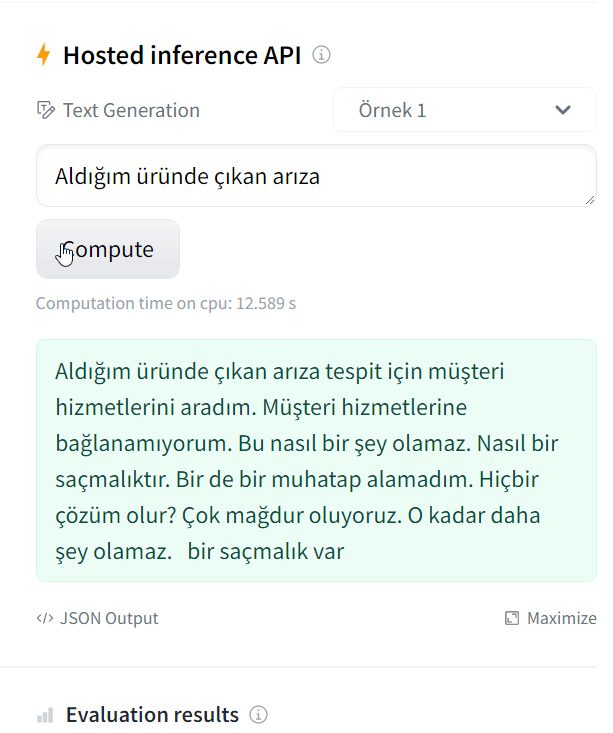

# Summary

In this tutorial, we completed the following actions 
* installing all the related libraries from the Hugging Face hub
* preparing a Hugging Face dataset from a csv file
* training a new Hugging Face tokenizer
* building a Hugging Face data pipeline
* initializing a new Hugging Face model and training it
* loading (pushing) the dataset, the tokenizer, and the model to the Hugging Face Hub
* downloading and using the dataset, the tokenizer, and the model from the Hugging Face Hub
* generating review with the Hugging Face text generation pipeline 

Do you have any ***questions*** or ***comments***?
Please share them in the comment section.

**Thank you for your attention!**